**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

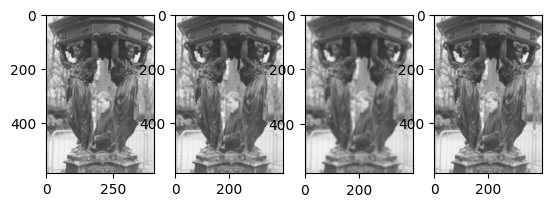

In [ ]:
img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

def convolution(img, mask):
  x, y = img.shape
  a = (len(mask) - 1) // 2
  b = (len(mask[0]) - 1) // 2

  out_h = x - 2*a
  out_w = y - 2*b

  newImage = [[0.0 for _ in range(out_w)] for _ in range(out_h)]

  for i in range(a, x - a):
    for j in range(b, y - b):
      s = 0.0
      for m in range(-a, a + 1):
        for n in range(-b, b + 1):
          s += float(img[i - m, j - n]) * float(mask[m + a][n + b])
      newImage[i - a][j - b] = s

  return newImage

matrix1 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], dtype=np.float32) / 5.0

matrix2 = np.array([[1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1],], dtype=np.float32) / 49.0

matrix3 = np.array([[1,3,1],
                    [3,16,3],
                    [1,3,1]], dtype=np.float32) / 32.0

#original:
plt.subplot(1, 4, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

#3x3 media simples:
for i in range(3):
  convolution1 = convolution(img1, matrix1)
plt.subplot(1, 4, 2)
plt.imshow(convolution1, cmap='gray', vmin=0, vmax=255)

#7x7 media simples
for i in range(3):
  convolution2 = convolution(img1, matrix2)
plt.subplot(1, 4, 3)
plt.imshow(convolution2, cmap='gray', vmin=0, vmax=255)

#3x3 media ponderada:
for i in range(3):
  convolution3 = convolution(img1, matrix3)
plt.subplot(1, 4, 4)
plt.imshow(convolution3, cmap='gray', vmin=0, vmax=255)

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

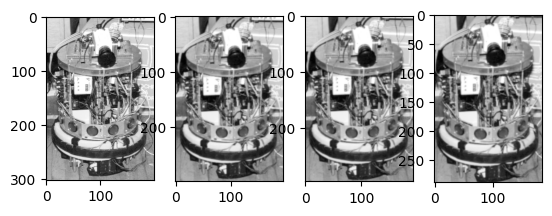

In [ ]:
import math

def gaussian(x, y, sigma=1):
  factor = (1/(2*math.pi*(sigma**2)))

  return factor*math.exp(-(x**2 + y**2))/(2*(sigma**2))

def get_gaussian_kernel(size, sigma=1):
  x,y = size
  a = (x-1)//2
  b = (y-1)//2
  kernel = [[0.0 for _ in range(x)] for _ in range(y)]

  for i in range(-a, a):
    for j in range(-b, b):
      kernel[i+a+1][j+b+1] = gaussian(i, j, sigma)
  return kernel


img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

sigmas = [2, 4, 9]
size_kernel = [[5,5],
               [9,9],
               [15,15]]

plt.subplot(1, len(sigmas)+1, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

for i in range(len(sigmas)):
  plt.subplot(1, len(sigmas)+1, i+2)
  kernel = get_gaussian_kernel(size_kernel[i], sigmas[i])
  plt.imshow(convolution(img2, kernel), cmap='gray');


3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

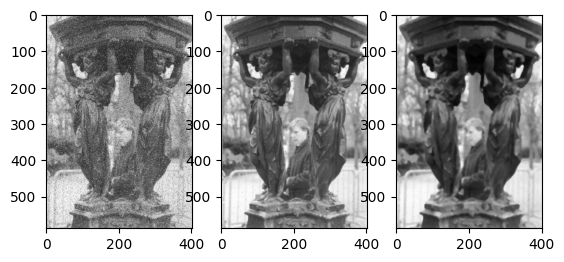

In [10]:
import cv2
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

#3x3
median3 = cv2.medianBlur(img3, 3)

#7x7
median7 = cv2.medianBlur(img3, 7)

plt.subplot(1,3,1)
plt.imshow(img3, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(median3, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(median7, cmap='gray')

plt.show()


4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper. Não utilizar a função pronta do openvc, mas pode usar numpy.median()
- 3×3 filter;	7×7 filter

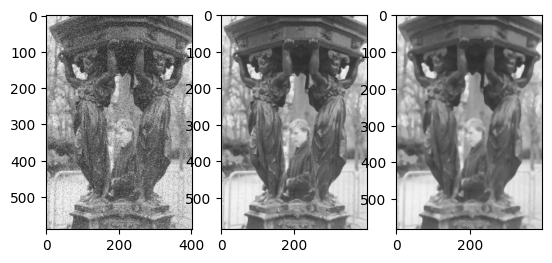

In [ ]:
def get_median(array):
  array.sort()
  if len(array) % 2 == 0:
    return (array[len(array)//2] + array[len(array)//2 - 1]) / 2
  else:
    return array[len(array)//2]

def median_convolution(img, kernel_size):
  x, y = img.shape
  a = (kernel_size[0] - 1) // 2
  b = (kernel_size[1] - 1) // 2

  out_h = x - 2*a
  out_w = y - 2*b

  newImage = [[0.0 for _ in range(out_w)] for _ in range(out_h)]
  for i in range(a, x - a):
    for j in range(b, y - b):
      array = []
      for m in range(-a, a + 1):
        for n in range(-b, b + 1):
          array.append(img[i + m][j + n])
      newImage[i - a][j - b] = get_median(array)
  return newImage

img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

kernel_size = [[3,3], [7,7]]

plt.subplot(1, len(kernel_size)+1, 1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

for i in range(len(kernel_size)):
  plt.subplot(1, len(kernel_size)+1, i+2)
  plt.imshow(median_convolution(img3, kernel_size[i]), cmap='gray', vmin=0, vmax=255)
